In [0]:
pip install xgboost

Python interpreter will be restarted.
Requirement already satisfied: xgboost in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ee5780f8-2cb3-434b-b27a-a6343b230ef6/lib/python3.7/site-packages (1.1.1)
Requirement already satisfied: scipy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ee5780f8-2cb3-434b-b27a-a6343b230ef6/lib/python3.7/site-packages (from xgboost) (1.4.1)
Requirement already satisfied: numpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ee5780f8-2cb3-434b-b27a-a6343b230ef6/lib/python3.7/site-packages (from xgboost) (1.18.1)
Python interpreter will be restarted.

In [0]:
# import required library
import warnings
import numpy as np
import pandas as pd
import xgboost as xg
import seaborn as sns
from math import sqrt
from datetime import datetime
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [0]:
# remove the warnings message
warnings.filterwarnings('ignore')

schema = StructType([StructField("ItemID",StringType(),True),\
StructField("Productline",StringType(),True),\
StructField("SeriesName",StringType(),True),\
StructField("SeriesNumber",StringType(),True),\
StructField("Status",StringType(),True),\
StructField("FiscalYear",IntegerType(),True),\
StructField("FiscalWeek",IntegerType(),True),\
StructField("AnniversarySale_MainEvent",IntegerType(),True),\
StructField("PostIndependenceDay_PostTentpole",IntegerType(),True),\
StructField("PreBlackFriday_PreTentpole",IntegerType(),True),\
StructField("PreIndependenceDay_PreTentpole",IntegerType(),True),\
StructField("PreNewYear_PreTentpole",IntegerType(),True),\
StructField("CyberMonday_MainEvent",IntegerType(),True),\
StructField("PostBlackFriday_PostTentpole",IntegerType(),True),\
StructField("PostMemorialDay_PostTentpole",IntegerType(),True),\
StructField("MemorialDay_MainEvent",IntegerType(),True),\
StructField("PreLaborDay_PostTentpole",IntegerType(),True),\
StructField("PreAnniversarySale_PreTentpole",IntegerType(),True),\
StructField("BlackFriday_PostTentpole",IntegerType(),True),\
StructField("PostAnniversarySale_PostTentpole",IntegerType(),True),\
StructField("PostLaborDay_PostTentpole",IntegerType(),True),\
StructField("PostNewYear_PostTentpole",IntegerType(),True),\
StructField("LaborDay_MainEvent",IntegerType(),True),\
StructField("BlackFriday_MainEvent",IntegerType(),True),\
StructField("PostPresidentsDay_PostTentpole",IntegerType(),True),\
StructField("PreLaborDay_PreTentpole",IntegerType(),True),\
StructField("IndependenceDay_MainEvent",IntegerType(),True),\
StructField("PreMemorialDay_PreTentpole",IntegerType(),True),\
StructField("NewYear_MainEvent",IntegerType(),True),\
StructField("PrePresidentsDay_PreTentpole",IntegerType(),True),\
StructField("PresidentsDay_MainEvent",IntegerType(),True),\
StructField("January",IntegerType(),True),\
StructField("Feburary",IntegerType(),True),\
StructField("March",IntegerType(),True),\
StructField("April",IntegerType(),True),\
StructField("May",IntegerType(),True),\
StructField("June",IntegerType(),True),\
StructField("July",IntegerType(),True),\
StructField("August",IntegerType(),True),\
StructField("September",IntegerType(),True),\
StructField("October",IntegerType(),True),\
StructField("November",IntegerType(),True),\
StructField("December",IntegerType(),True),\
StructField("AFHSPGZ1",IntegerType(),True),\
StructField("AFHSPGZ2",IntegerType(),True),\
StructField("AFHSPGZ3",IntegerType(),True),\
StructField("AFHSPGZ5",IntegerType(),True),\
StructField("AFHSPGZ6",IntegerType(),True),\
StructField("AFHSPGZ7",IntegerType(),True),\
StructField("AFHSPGZ8",IntegerType(),True),\
StructField("SALES",FloatType(),True),\
StructField("Quantity",FloatType(),True),\
StructField("Discounts",FloatType(),True),\
StructField("COGS",FloatType(),True),\
StructField("PrevWeekSales",FloatType(),True),\
StructField("PrevWeek2Sales",FloatType(),True),\
StructField("PrevWeek3Sales",FloatType(),True),\
StructField("PrevWeekQuantity",FloatType(),True),\
StructField("QuantityDiff",FloatType(),True),\
StructField("ATPQty",FloatType(),True)
])

In [0]:
# load the data
df = spark.read.format("csv").option("header",True).schema(schema).load("/mnt/refined-zone/Distribution/new_data_v5/")
data = df.toPandas()

In [0]:
#cdf = spark.read.format("csv").option("header",True).schema(schema).load("/mnt/refined-zone/Distribution/new_data/")
#df = cdf.toPandas()
data.head()

,ItemID,Productline,SeriesName,SeriesNumber,Status,FiscalYear,FiscalWeek,AnniversarySale_MainEvent,PostIndependenceDay_PostTentpole,PreBlackFriday_PreTentpole,PreIndependenceDay_PreTentpole,PreNewYear_PreTentpole,CyberMonday_MainEvent,PostBlackFriday_PostTentpole,PostMemorialDay_PostTentpole,MemorialDay_MainEvent,PreLaborDay_PostTentpole,PreAnniversarySale_PreTentpole,BlackFriday_PostTentpole,PostAnniversarySale_PostTentpole,PostLaborDay_PostTentpole,PostNewYear_PostTentpole,LaborDay_MainEvent,BlackFriday_MainEvent,PostPresidentsDay_PostTentpole,PreLaborDay_PreTentpole,IndependenceDay_MainEvent,PreMemorialDay_PreTentpole,NewYear_MainEvent,PrePresidentsDay_PreTentpole,PresidentsDay_MainEvent,January,Feburary,March,April,May,June,July,August,September,October,November,December,AFHSPGZ1,AFHSPGZ2,AFHSPGZ3,AFHSPGZ5,AFHSPGZ6,AFHSPGZ7,AFHSPGZ8,SALES,Quantity,Discounts,COGS,PrevWeekSales,PrevWeek2Sales,PrevWeek3Sales,PrevWeekQuantity,QuantityDiff,ATPQty
0,D372-630,Dining,Centiar,D372,Current,2020,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,459.0,6.0,-15.300000,234.539993,306.0,306.0,612.0,4.0,2.0,NaN
1,D372-630,Dining,Centiar,D372,Current,2020,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,306.0,4.0,-22.959999,156.360001,459.0,306.0,306.0,6.0,-2.0,NaN
2,D372-630,Dining,Centiar,D372,Current,2020,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,459.0,6.0,0.000000,233.320007,306.0,459.0,306.0,4.0,2.0,NaN
3,D372-630,Dining,Centiar,D372,Current,2020,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,459.0,6.0,0.000000,232.710007,459.0,306.0,459.0,6.0,0.0,NaN
4,D372-630,Dining,Centiar,D372,Current,2020,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,306.0,4.0,0.000000,156.360001,459.0,459.0,306.0,6.0,-2.0,NaN


In [0]:
# Filter data with quantity more than 0
data = data[(data['FiscalYear']>=2021)]

In [0]:
data[['Quantity','ATPQty','COGS']].describe()

,Quantity,ATPQty,COGS
count,2.494639e+06,2.478287e+06,2.494639e+06
mean,1.077649e+00,3.355867e+01,1.602094e+02
std,5.669652e+00,1.641740e+02,7.418458e+02
min,0.000000e+00,-2.023000e+03,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.950000e+01,4.214505e+01
max,9.099999e+02,1.265350e+04,1.237573e+05


In [0]:
data.columns

Out[7]: Index(['ItemID', 'Productline', 'SeriesName', 'SeriesNumber', 'Status',
 'FiscalYear', 'FiscalWeek', 'AnniversarySale_MainEvent',
 'PostIndependenceDay_PostTentpole', 'PreBlackFriday_PreTentpole',
 'PreIndependenceDay_PreTentpole', 'PreNewYear_PreTentpole',
 'CyberMonday_MainEvent', 'PostBlackFriday_PostTentpole',
 'PostMemorialDay_PostTentpole', 'MemorialDay_MainEvent',
 'PreLaborDay_PostTentpole', 'PreAnniversarySale_PreTentpole',
 'BlackFriday_PostTentpole', 'PostAnniversarySale_PostTentpole',
 'PostLaborDay_PostTentpole', 'PostNewYear_PostTentpole',
 'LaborDay_MainEvent', 'BlackFriday_MainEvent',
 'PostPresidentsDay_PostTentpole', 'PreLaborDay_PreTentpole',
 'IndependenceDay_MainEvent', 'PreMemorialDay_PreTentpole',
 'NewYear_MainEvent', 'PrePresidentsDay_PreTentpole',
 'PresidentsDay_MainEvent', 'January', 'Feburary', 'March', 'April',
 'May', 'June', 'July', 'August', 'September', 'October', 'November',
 'December', 'AFHSPGZ1', 'AFHSPGZ2', 'AFHSPGZ3', 'AFHSPGZ5', 'AFHSPGZ6',
 'AFHSPGZ7', 'AFHSPGZ8', 'SALES', 'Quantity', 'Discounts', 'COGS',
 'PrevWeekSales', 'PrevWeek2Sales', 'PrevWeek3Sales', 'PrevWeekQuantity',
 'QuantityDiff', 'ATPQty'],
 dtype='object')

In [0]:
data['Quantity_Type'] = data['Quantity'].apply(lambda x: 1 if x>0 else 0)
data.head()

,ItemID,Productline,SeriesName,SeriesNumber,Status,FiscalYear,FiscalWeek,AnniversarySale_MainEvent,PostIndependenceDay_PostTentpole,PreBlackFriday_PreTentpole,PreIndependenceDay_PreTentpole,PreNewYear_PreTentpole,CyberMonday_MainEvent,PostBlackFriday_PostTentpole,PostMemorialDay_PostTentpole,MemorialDay_MainEvent,PreLaborDay_PostTentpole,PreAnniversarySale_PreTentpole,BlackFriday_PostTentpole,PostAnniversarySale_PostTentpole,PostLaborDay_PostTentpole,PostNewYear_PostTentpole,LaborDay_MainEvent,BlackFriday_MainEvent,PostPresidentsDay_PostTentpole,PreLaborDay_PreTentpole,IndependenceDay_MainEvent,PreMemorialDay_PreTentpole,NewYear_MainEvent,PrePresidentsDay_PreTentpole,PresidentsDay_MainEvent,January,Feburary,March,April,May,June,July,August,September,October,November,December,AFHSPGZ1,AFHSPGZ2,AFHSPGZ3,AFHSPGZ5,AFHSPGZ6,AFHSPGZ7,AFHSPGZ8,SALES,Quantity,Discounts,COGS,PrevWeekSales,PrevWeek2Sales,PrevWeek3Sales,PrevWeekQuantity,QuantityDiff,ATPQty,Quantity_Type
17,D372-630,Dining,Centiar,D372,Current,2021,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,594.0,6.0,-59.400002,251.070007,0.0,0.0,0.0,0.0,6.0,0.0,1
18,D372-630,Dining,Centiar,D372,Current,2021,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,374.0,4.0,0.000000,168.750000,0.0,0.0,0.0,0.0,4.0,0.0,1
19,D372-630,Dining,Centiar,D372,Current,2021,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,374.0,4.0,-18.700001,169.639999,374.0,0.0,0.0,4.0,0.0,0.0,1
20,D372-630,Dining,Centiar,D372,Current,2021,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,85.0,1.0,0.000000,2.500000,374.0,374.0,0.0,4.0,-3.0,0.0,1
21,D372-630,Dining,Centiar,D372,Current,2021,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,408.0,4.0,0.000000,176.789993,0.0,0.0,0.0,0.0,4.0,0.0,1


In [0]:
df_new=data.drop(['ItemID','Productline','SeriesName','Status','SeriesNumber','PrevWeekSales','PrevWeek2Sales','PrevWeek3Sales','ATPQty'], axis=1) #Excluding UserId
df_new.head()

,FiscalYear,FiscalWeek,AnniversarySale_MainEvent,PostIndependenceDay_PostTentpole,PreBlackFriday_PreTentpole,PreIndependenceDay_PreTentpole,PreNewYear_PreTentpole,CyberMonday_MainEvent,PostBlackFriday_PostTentpole,PostMemorialDay_PostTentpole,MemorialDay_MainEvent,PreLaborDay_PostTentpole,PreAnniversarySale_PreTentpole,BlackFriday_PostTentpole,PostAnniversarySale_PostTentpole,PostLaborDay_PostTentpole,PostNewYear_PostTentpole,LaborDay_MainEvent,BlackFriday_MainEvent,PostPresidentsDay_PostTentpole,PreLaborDay_PreTentpole,IndependenceDay_MainEvent,PreMemorialDay_PreTentpole,NewYear_MainEvent,PrePresidentsDay_PreTentpole,PresidentsDay_MainEvent,January,Feburary,March,April,May,June,July,August,September,October,November,December,AFHSPGZ1,AFHSPGZ2,AFHSPGZ3,AFHSPGZ5,AFHSPGZ6,AFHSPGZ7,AFHSPGZ8,SALES,Quantity,Discounts,COGS,PrevWeekQuantity,QuantityDiff,Quantity_Type
17,2021,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,594.0,6.0,-59.400002,251.070007,0.0,6.0,1
18,2021,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,374.0,4.0,0.000000,168.750000,0.0,4.0,1
19,2021,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,374.0,4.0,-18.700001,169.639999,4.0,0.0,1
20,2021,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,85.0,1.0,0.000000,2.500000,4.0,-3.0,1
21,2021,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,408.0,4.0,0.000000,176.789993,0.0,4.0,1


In [0]:
df_new.shape

Out[10]: (2494639, 52)

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure,homogeneity_score

In [0]:
 x = df_new.iloc[:,45:49] # 1t for rows and second for columns
x

,SALES,Quantity,Discounts,COGS
17,594.0,6.0,-59.400002,251.070007
18,374.0,4.0,0.000000,168.750000
19,374.0,4.0,-18.700001,169.639999
20,85.0,1.0,0.000000,2.500000
21,408.0,4.0,0.000000,176.789993
...,...,...,...,...
4661771,0.0,0.0,0.000000,0.000000
4661772,0.0,0.0,0.000000,0.000000
4661773,0.0,0.0,0.000000,0.000000
4661774,0.0,0.0,0.000000,0.000000


In [0]:
kmeans = KMeans(3)
kmeans.fit(x)

Out[13]: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)

In [0]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

Out[14]: array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,2.494639e+06,2.494639e+06,2.494639e+06,2.494639e+06
mean,-1.629960e-07,-2.251899e-07,3.013542e-07,-4.176681e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.383458e-01,-1.900732e-01,-1.103404e+02,-2.159606e-01
25%,-2.383458e-01,-1.900732e-01,1.781688e-01,-2.159606e-01
50%,-2.383458e-01,-1.900732e-01,1.781688e-01,-2.159606e-01
75%,-1.735050e-01,-1.369550e-02,1.781688e-01,-1.591495e-01
max,1.382309e+02,1.603136e+02,1.781688e-01,1.666075e+02


In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

Out[16]: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)

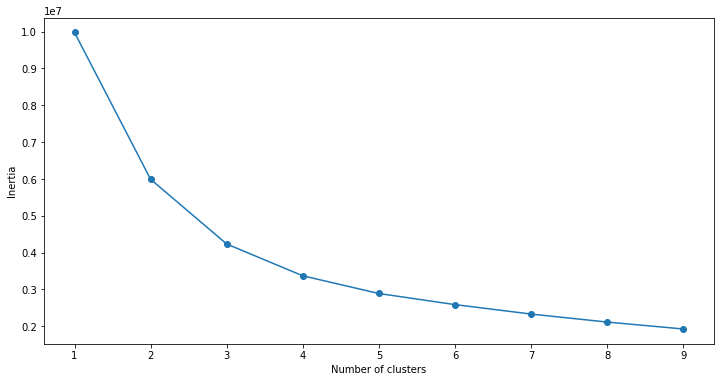

In [0]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [0]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [0]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

Out[19]: 0 2293969
2 169857
4 26187
1 4175
3 451
Name: cluster, dtype: int64

In [0]:
frame.tail()

,0,1,2,3,cluster
2494634,-0.238346,-0.190073,0.178169,-0.215961,0
2494635,-0.238346,-0.190073,0.178169,-0.215961,0
2494636,-0.238346,-0.190073,0.178169,-0.215961,0
2494637,-0.238346,-0.190073,0.178169,-0.215961,0
2494638,-0.238346,-0.190073,0.178169,-0.215961,0


In [0]:
# Generate data with 3 centers.


# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(x)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(x)

# Plot the predictions
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Print the evaluations
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

In [0]:
## DBSCAN

In [0]:
from sklearn.cluster import DBSCAN
eps_list=np.linspace(0.1,3,10)
min_samples_list=range(2,12)
results=[]
results_scaled=[]
results_scaled_pca=[]
for i in range(10):
    clustering = DBSCAN(eps=eps_list[i], min_samples=min_samples_list[i], algorithm ='kd_tree').fit(x)
    clustering.labels_
    no_clusters=len(np.unique(clustering.labels_))
    if no_clusters>1:
        results.append([silhouette_score(x,clustering.labels_),no_clusters,eps_list[i],min_samples_list[i]])
    
    clustering = DBSCAN(eps=eps_list[i], min_samples=min_samples_list[i], algorithm ='kd_tree').fit(df_scaled)
    clustering.labels_
    no_clusters=len(np.unique(clustering.labels_))
    if no_clusters>1:
        results_scaled.append([silhouette_score(df_scaled,clustering.labels_),no_clusters,eps_list[i],min_samples_list[i]])
    
    clustering = DBSCAN(eps=eps_list[i], min_samples=min_samples_list[i], algorithm ='kd_tree').fit(df_scaled_pca)
    clustering.labels_
    no_clusters=len(np.unique(clustering.labels_))
    if no_clusters>1:
        results_scaled_pca.append([silhouette_score(df_scaled_pca,clustering.labels_),no_clusters,eps_list[i],min_samples_list[i]])

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df_new)
df_scaled=pd.DataFrame(scaler.transform(df_new))

df_scaled.head()

In [0]:
#Pca on scaled data
df_scaled_pca = PCA(n_components=2).fit_transform(x)
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=["PC1", "PC2"])

df_scaled_pca.head()

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_scaled)

In [0]:
x.info()

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure,homogeneity_score

In [0]:
results=[]
results_scaled=[]
results_scaled_pca=[]
range_=range(2,10)
for no_clus in range_:
    clus_kmeans = KMeans(n_clusters=no_clus)
    results.append(silhouette_score(x,clus_kmeans.fit(x).labels_))

    clus_kmeans_scaled = KMeans(n_clusters=no_clus)
    results_scaled.append(silhouette_score(df_scaled,clus_kmeans_scaled.fit(df_scaled).labels_))

    clus_kmeans_scaled_pca = KMeans(n_clusters=no_clus)
    results_scaled_pca.append(silhouette_score(df_scaled_pca,clus_kmeans_scaled_pca.fit(df_scaled_pca).labels_))

line_chart1 = plt.plot(range_, results)
line_chart1 = plt.plot(range_, results_scaled)
line_chart1 = plt.plot(range_, results_scaled_pca)
plt.title('Silhouette Coefficient by Kmeans')
plt.xlabel('Numbers of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(['Data','Scaled','Scaled_PCA'], loc=4)
plt.show()


In [0]:
clus_kmeans_scaled_pca_best = KMeans(n_clusters=3)
labels_best=clus_kmeans_scaled_pca_best.fit(df_scaled_pca).labels_

plt.scatter(df_scaled_pca['PC1'],df_scaled_pca['PC2'], c=labels_best,s=20, marker = 'o', cmap=cm.Set3)
plt.title("Clusters labeled by Kmeans, visualization on 2D by PCA\n The best results were using 3 clusters");

In [0]:
a = data.groupby(['ItemID','Quantity_Type']).agg({'ItemID':'count'})
a['Count'] = a['ItemID']
a.drop(['ItemID'],inplace=True, axis=1)
b = a.reset_index()
c = b[b['Quantity_Type']==0]
b = b[b['Quantity_Type']==1]
d = pd.merge(c[['ItemID','Count']],b[['ItemID','Count']],on='ItemID',how='left')
d['Count_ratio'] = (d['Count_y']/(d['Count_y']+d['Count_x']))*100
e = d.sort_values(by='Count_ratio')

In [0]:
f=e[e['Count_ratio']>15]
value_list = f.ItemID.unique().tolist()
data = data.query('ItemID in @value_list')
data.head()

In [0]:
data.shape #(1969450, 61)
#data.shape #(3887800, 61)

In [0]:
data.head()

In [0]:
exc_cols = ['CyberMonday_MainEvent', 'PostBlackFriday_PostTentpole', 'PostLaborDay_PostTentpole', 'PostPresidentsDay_PostTentpole', 'PreLaborDay_PostTentpole']
#tentpole_cols = [i for i in list(df.loc[:,7:31].columns) if i not in exc_cols]
tentpole_cols = [i for i in list(data.iloc[:,7:31].columns) if i not in exc_cols]
data.rename(columns={'SALES':'Sales'}, inplace=True)

# Creating new features
data["Holiday"] = data[tentpole_cols].apply(lambda x: 1 if sum(x)>0 else 0, axis=1)
# data['DiscountPercent'] = round(abs(data['Discounts']/data['Sales'])*100,1)
data['AverageWeeklyPricePreCoupon'] = data['Sales'] / data['Quantity']
data['AverageWeeklyPrice'] = (data['Sales'] + data['Discounts']) / data['Quantity']
data['AverageWeeklyCOGS'] = data['COGS'] / data['Quantity']
data['AverageWeeklyCOGS'] = data['AverageWeeklyCOGS'].replace(0, np.nan)
data['AverageWeeklyPrice'] = data['AverageWeeklyPrice'].replace(0, np.nan)
data.dropna(subset=['AverageWeeklyPrice', 'AverageWeeklyCOGS'], inplace=True)

In [0]:
data.columns

In [0]:
data['price_categories'] = data['AverageWeeklyPrice'].map (lambda price: 1 if price < 200 else 2 if price < 400 else 3)
data['Deviation_price'] = data['AverageWeeklyPrice'] - data['AverageWeeklyPricePreCoupon']

In [0]:
#data['Quantity'].describe()
data['Quantity_deciles']=pd.qcut(data['Quantity'],q=3,labels=False,duplicates='drop')
data['PriceZone'] = data[['AFHSPGZ1', 'AFHSPGZ2', 'AFHSPGZ3', 'AFHSPGZ5','AFHSPGZ6', 'AFHSPGZ7', 'AFHSPGZ8']].idxmax(axis=1)

data['Quantity_deciles'].value_counts()

In [0]:
display(data)

In [0]:
# drop null values based on all the rows
data.dropna(inplace=True)
data = data.reset_index(drop=True)

# Data For Training
train_data = data.drop(data[(data['FiscalYear'] == 2022)&(data['FiscalWeek'] > 22)].index)

In [0]:
test_df = data[(data['FiscalYear'] == 2022)&(data['FiscalWeek'].isin([23,24,25]))]

In [0]:
display(train_data)

In [0]:
display(test_df)

In [0]:
# Model Building


train_df = pd.DataFrame()
evaluation_dict = {"Product line":[], "R-Square":[], "RMSE":[], "MAE":[]}
models = dict()

price_zone_list = list(data['PriceZone'].unique())
prod_line_list = list(data['Productline'].unique())

remove_cols = ['ItemID', 'Productline','FiscalYear','Quantity', 'Discounts', 'Sales', 'COGS', 'SeriesName', 'SeriesNumber',
               'Status', 'PrevWeekQuantity', 'QuantityDiff','PriceZone'] + exc_cols
  
for prod in prod_line_list:
  for pric_lst in price_zone_list:
    temp = train_data[(train_data.Productline == prod)& (train_data.PriceZone == pric_lst)]
    p = np.percentile(temp['Quantity'], 99.99)
    temp = temp[temp['Quantity']<=p]

    X = temp.drop(remove_cols,axis=1)
    y = temp['QuantityDiff']

    XGBR = xg.XGBRegressor(n_estimators=70, objectvie='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.4)
    mod = XGBR.fit(X,y)
    models[prod] = mod
    temp['Predicted_Quantity'] = np.round(mod.predict(X),1) + temp['PrevWeekQuantity']
    train_df = pd.concat([train_df,temp], axis=0, ignore_index=True)

# Evaluation
    evaluation_dict["Product line"].append(prod)
    evaluation_dict["R-Square"].append(round(sqrt(r2_score(temp['Quantity'], temp['Predicted_Quantity'])),2))
    evaluation_dict["RMSE"].append(round(sqrt(mean_squared_error(temp['Quantity'], temp['Predicted_Quantity'])),2))
    evaluation_dict["MAE"].append(round(mean_absolute_error(temp['Quantity'], temp['Predicted_Quantity']),2))

metric_df = pd.DataFrame(evaluation_dict)

In [0]:
# train_df.tail(10)

In [0]:
met_df = spark.createDataFrame(metric_df)
display(met_df)

In [0]:
plt.rcParams["figure.figsize"] = (15,10)
train_df.plot.scatter(x = 'Quantity', y = 'Predicted_Quantity', s = 50)

In [0]:
final_df = pd.DataFrame()
ivs = list(X.columns)
for mod in models.keys():
  tmp = test_df[test_df['Productline'] == mod]
  p = np.percentile(tmp['Quantity'], 99.99)
  tmp = tmp[tmp['Quantity']<=p]
  tmp['Predicted_Quantity'] = models[mod].predict(tmp[ivs])
  tmp['Predicted_Quantity'] = tmp['Predicted_Quantity'] + tmp['PrevWeekQuantity']
  tmp['Predicted_Sales'] = tmp['Predicted_Quantity'] * data['AverageWeeklyPricePreCoupon']
  final_df = pd.concat([final_df,tmp], axis=0, ignore_index=True)
  

In [0]:
x = models['Bedroom'].predict(tmp[ivs])

In [0]:
final_df2 = final_df[final_df['Predicted_Quantity']>0]
final_df.plot.scatter(x = 'Quantity', y = 'Predicted_Quantity', s = 50)

In [0]:
final_df.groupby(by='FiscalWeek').agg({'Quantity':'sum','Predicted_Quantity':'sum','Sales':'sum','Predicted_Sales':'sum'}).reset_index()

In [0]:
# final_df = spark.createDataFrame(final_df)
display(final_df)

In [0]:
X.columns

In [0]:
# Loading tentpole calender table
csvdf2 = spark.read.format("csv").option("header",True).load("/mnt/refined-zone/Distribution/PromoCalendar/")
tenpole = csvdf2.toPandas()

# Convert the data type
tenpole = tenpole.astype({'FiscalYear':'int','FiscalWeek':'int'})

# Concatenating tentploe events
tenpole['new_tentpole'] = tenpole[['Fiscal-Tentpole','Fiscal-TentpolePeriod']].apply(lambda x: str(x[0])+'_'+str(x[1]),axis=1)

# Remove the spaces before and after the values
tenpole['FiscalMonthName'] = tenpole['FiscalMonthName'].apply(lambda x: str(x).strip())

In [0]:
# Preparing test data
df_forecast = train_data.sort_values(by=['FiscalYear','FiscalWeek'], ascending=False)

# drop the duplicates based on pricezone and itemid
df_forecast = df_forecast.drop_duplicates(subset=['ItemID','AFHSPGZ1','AFHSPGZ2','AFHSPGZ3','AFHSPGZ5','AFHSPGZ6','AFHSPGZ7','AFHSPGZ8'])
df_forecast = df_forecast.reset_index(drop=True)

# Take the current week and current year for looping
current_yr, current_wk = df_forecast.iloc[0,5], df_forecast.iloc[0,6]

iv_cols = list(X.columns)

In [0]:
# Load new pricing data
new_price = spark.read.format("csv").option("header",True).load("/mnt/refined-zone/Distribution/Test_Analytics1/")
nw_prc = new_price.toPandas()

nw_prc['Sku'] = [str(i).strip() for i in nw_prc['Sku']]
id_lst = list(df_forecast.ItemID.unique())

# Filter out the itemid's which are there in predition data
new_price_df = nw_prc[nw_prc['Sku'].isin(id_lst)][['Sku', 'Status','Z1Best', 'Z2Best','Z3Best', 'Z5Best', 'Z6Best', 'Z7Best','Z8Best']]

# Changing column names
new_price_df.rename(columns={'Z1Best':'AFHSPGZ1', 'Z2Best':'AFHSPGZ2', 'Z3Best':'AFHSPGZ3', 'Z5Best':'AFHSPGZ5', 'Z6Best':'AFHSPGZ6',
       'Z7Best':'AFHSPGZ7', 'Z8Best':'AFHSPGZ8'}, inplace=True)

# Create a pricezone as new column in forecast data
df_forecast['PriceZone'] = df_forecast[['AFHSPGZ1', 'AFHSPGZ2', 'AFHSPGZ3', 'AFHSPGZ5','AFHSPGZ6', 'AFHSPGZ7', 'AFHSPGZ8']].idxmax(axis=1)

# make the list of unique sku's from the new price table
sku_list = list(new_price_df.Sku.unique())

# loop to assign the new prices based on item id and pricezone on the forecasting data 
for i in range(len(df_forecast)):
  x,y = df_forecast.loc[i,'ItemID'], df_forecast.loc[i,'PriceZone']
  if x in sku_list:
    z = new_price_df[new_price_df['Sku']==x][y].iloc[0]
    if z is not None:
      df_forecast.loc[i,'AverageWeeklyPrice'] = float(z)
    
# drop newly created pricezone column and calculate new log price - not this one
#df_forecast.drop(['PriceZone'],axis=1,inplace=True)

In [0]:
atp_data = df[(df['FiscalYear']==2022)&(df['FiscalWeek']>25)]
atp_data = atp_data[['ItemID','FiscalWeek','AFHSPGZ1','AFHSPGZ2','AFHSPGZ3','AFHSPGZ5','AFHSPGZ6','AFHSPGZ7','AFHSPGZ8','ATPQty']]

In [0]:
atp_data = atp_data.dropna()

In [0]:
wk_26 = atp_data[atp_data['FiscalWeek']==26]

In [0]:
df_forecast.columns

In [0]:
n = 0
final_df = pd.DataFrame()
months = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
val_2 = 54-current_wk
for week in range(current_wk,current_wk+val_2):
  if n == 0:
    df_forecast['FiscalWeek'] = week
    
    new_tent_cols = tentpole_cols.copy()
    months_lst = months.copy()
    
    df_forecast['DiscountPercent'] = 10
    tp_col = tenpole[(tenpole['FiscalYear'] == current_yr)&(tenpole['FiscalWeek'] == week)]['new_tentpole'].iloc[0]
    mth_col = tenpole[(tenpole['FiscalYear'] == current_yr)&(tenpole['FiscalWeek'] == week)]['FiscalMonthName'].iloc[0]
    
    if tp_col != 'None_None':
      new_tent_cols.remove(tp_col)
      df_forecast[tp_col] = 1
      
    months_lst.remove(mth_col)
    
    df_forecast[months_lst] = df_forecast[months_lst].applymap(lambda x: 0)
    df_forecast[mth_col] = 1
    
    df_forecast[new_tent_cols] = df_forecast[new_tent_cols].applymap(lambda x: 0)
    df_forecast["Holiday"] = df_forecast[tentpole_cols].apply(lambda x: 1 if sum(x)>0 else 0, axis=1)
    df_forecast.dropna(inplace=True)
    
    # prediction Test Data
    forecast = pd.DataFrame()
    
    for prod in prod_line_list:
      for pric_lst in price_zone_list:
        forecasted_df = df_forecast[(df_forecast.Productline == prod)& (df_forecast.PriceZone == pric_lst)].reset_index(drop = True)
        #forecasted_df = df_forecast[df_forecast['Productline'] == prod].reset_index(drop = True)
        test_x = forecasted_df[iv_cols]
        forecasted_df['Predicted_Quantity'] = np.round(models[prod].predict(test_x),1)
        forecasted_df['Pred_Sales'] = forecasted_df['Predicted_Quantity'] * forecasted_df['AverageWeeklyPrice']
        forecast = pd.concat([forecast,forecasted_df], axis=0, ignore_index=True)
    
    final_df = pd.concat([final_df,forecast], axis=0, ignore_index=True)
    
  else:
    nw_wk = week-1
    df_forecast = final_df[final_df['FiscalWeek'] == nw_wk]
    df_forecast['FiscalWeek'] = week
    
    new_tent_cols = tentpole_cols.copy()
    months_lst = months.copy()
    
    tp_col = tenpole[(tenpole['FiscalYear'] == current_yr)&(tenpole['FiscalWeek'] == week)]['new_tentpole'].iloc[0]
    mth_col = tenpole[(tenpole['FiscalYear'] == current_yr)&(tenpole['FiscalWeek'] == week)]['FiscalMonthName'].iloc[0]
    
    if tp_col != 'None_None':
      new_tent_cols.remove(tp_col)
      df_forecast[tp_col] = 1
      
    df_forecast[new_tent_cols] = df_forecast[new_tent_cols].applymap(lambda x: 0)
    
    
    months_lst.remove(mth_col)
    
    df_forecast[months_lst] = df_forecast[months_lst].applymap(lambda x: 0)
    df_forecast[mth_col] = 1
    df_forecast['DiscountPercent'] = 10
         
    df_forecast["Holiday"] = df_forecast[tentpole_cols].apply(lambda x: 1 if sum(x)>0 else 0, axis=1)
    
    df_forecast.dropna(inplace=True)
    
    forecast = pd.DataFrame()
    for prod in prod_line_list:
      for pric_lst in price_zone_list:
        forecasted_df = df_forecast[(df_forecast.Productline == prod)& (df_forecast.PriceZone == pric_lst)].reset_index(drop = True)
        #forecasted_df = df_forecast[df_forecast['Productline'] == prod].reset_index(drop = True)
        test_x = forecasted_df[iv_cols]
        forecasted_df['Predicted_Quantity'] = np.round(models[prod].predict(test_x),1)
        forecasted_df['Pred_Sales'] = forecasted_df['Predicted_Quantity'] * forecasted_df['AverageWeeklyPrice']
        forecast = pd.concat([forecast,forecasted_df], axis=0, ignore_index=True)

    final_df = pd.concat([final_df,forecast], axis=0, ignore_index=True)
    
  n = n+1

In [0]:
final_df.shape

In [0]:
grp_cols = ['ItemID','Productline','FiscalWeek','AFHSPGZ1', 'AFHSPGZ2', 'AFHSPGZ3', 'AFHSPGZ5', 'AFHSPGZ6', 'AFHSPGZ7', 'AFHSPGZ8']
df_final = final_df.groupby(by=grp_cols).agg({'Predicted_Quantity':'sum','Pred_Sales':'sum'}).reset_index()

#tz_NY = pytz.timezone('Asia/Kolkata')  
#now = datetime.now(tz_NY)
df_final['UniqueID'] = 'XGBReg_'+str(now.strftime('%B'))+str(now.day)+str(now.time())[:2]+str(now.time())[3:5]
df_final['ModelName'] = 'XG Boost Regression'
df_final['Description'] = 'Xgboost model with previews week sales, quantity difference and discount rate(10%)'
df_final['RunDateTime'] = pd.to_datetime(now, format='%Y/%m/%d %H:%M:%S')

df_final = df_final[[ 'UniqueID', 'ItemID', 'Productline', 'FiscalWeek', 'AFHSPGZ1', 'AFHSPGZ2', 'AFHSPGZ3', 'AFHSPGZ5', 'AFHSPGZ6', 'AFHSPGZ7', 'AFHSPGZ8','Predicted_Quantity', 'Predicted_Sales', 'ModelName', 'Description', 'RunDateTime']]

In [0]:
df_final = spark.createDataFrame(df_final)
display(df_final)

In [0]:
final_df.groupby(by='FiscalWeek').agg({'Predicted_Quantity':'sum','Pred_Sales':'sum'}).reset_index()

In [0]:
len(final_df['ItemID'].unique())

In [0]:
df_final = final_df.groupby(by='FiscalWeek').agg({'Predicted_Quantity':'sum','Pred_Sales':'sum'}).reset_index()
df_final['Model_Name'] = 'XG Boost Regression'
df_final['Model_Description'] = 'Model was built on product line level with previews week sales and difference in qty is used for prediction'
now = datetime.now()
df_final['RunDateTime'] = pd.to_datetime(now, format='%Y/%m/%d %H:%M:%S')

In [0]:
display(final_df)

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
spark = SparkSession.builder.appName("pandas to spark").getOrCreate()
df_spark = spark.createDataFrame(df_final)
dffinal = df_spark.selectExpr('Model_Name as ModelName','Model_Description as ModelDescription','cast(FiscalWeek as int) FiscalWeek','cast(Predicted_Quantity as decimal(10,2)) PredictedQuantity','cast(Pred_Sales as decimal(15,2)) PredSales','RunDateTime') 
display(dffinal)

In [0]:
met_df = spark.createDataFrame(metric_df)
display(met_df)

In [0]:
plt.rcParams["figure.figsize"] = (15,10)
train_df.plot.scatter(x = 'Quantity', y = 'Predicted_Quantity', s = 50)

In [0]:
#final_df = spark.createDataFrame(final_df)
display(final_df)

In [0]:
Bedding = final_df[final_df['Productline'] == 'Bedding']
Bedding.shape

In [0]:
Bedding_top_20=Bedding.groupby(['ItemID'])['Sales'].sum().sort_values(ascending=False).head(20).index.to_list()
Bedding_top=final_df[final_df.ItemID.isin(Bedding_top_20)]
Bedding_top.shape

Bedding_bottom_20=Bedding.groupby(['ItemID'])['Sales'].sum().sort_values(ascending=True).head(20).index.to_list()
Bedding_bottom=final_df[final_df.ItemID.isin(Bedding_bottom_20)]
Bedding_bottom.shape

Bedding_top_20=Bedding.groupby(['ItemID'])['Sales'].sum().sort_values(ascending=False).head(20).index.to_list()
Bedding_rest=final_df[~final_df.ItemID.isin(Bedding_top_20)]
Bedding_rest.shape

In [0]:
Bedding_top['Error_Qty'] = Bedding_top['Predicted_Quantity'] - Bedding_top['Quantity'] 
Bedding_bottom['Error_Qty'] = Bedding_bottom['Predicted_Quantity'] - Bedding_bottom['Quantity'] 
Bedding_rest['Error_Qty'] = Bedding_rest['Predicted_Quantity'] - Bedding_rest['Quantity'] 

In [0]:
Bedding_top.groupby(['ItemID'])['Error_Qty'].sum().sort_values(ascending=False).plot(kind="bar")

In [0]:
Bedding_top[Bedding_top['ItemID'] == 'M69631']


In [0]:
Bedding_top[Bedding_top['ItemID'] == 'M69621'][['ItemID','FiscalWeek','AFHSPGZ1', 'AFHSPGZ2', 'AFHSPGZ3', 'AFHSPGZ5', 'AFHSPGZ6',
       'AFHSPGZ7', 'AFHSPGZ8','Sales','Pred_Sales','Quantity','Predicted_Quantity','Error_Qty']]

In [0]:
Bedding_top[Bedding_top['ItemID'] == 'M69631'][['ItemID','FiscalWeek','AFHSPGZ1', 'AFHSPGZ2', 'AFHSPGZ3', 'AFHSPGZ5', 'AFHSPGZ6',
       'AFHSPGZ7', 'AFHSPGZ8','Sales','Pred_Sales','Quantity','Predicted_Quantity','Error_Qty']]

In [0]:
final_df.groupby(['ItemID','Productline'])['Sales'].mean().sort_values(ascending=False).head(20).plot(kind="bar")

In [0]:
final_df['price_categories'] = final_df['AverageWeeklyPrice'].map (lambda price: 'low' if price < 200 else 'medium' if price < 400 else 'high')
final_df['Error_Qty'] = final_df['Predicted_Quantity'] - final_df['Quantity'] 

In [0]:
import seaborn as sns
sns.barplot(x='price_categories',y='Error_Qty',data=final_df)
plt.show()

In [0]:
final_df['Sales_deciles']=pd.qcut(final_df['Sales'],q=10,labels=False,duplicates='drop')


In [0]:
groups = final_df.groupby(['Sales_deciles'])['Error_Qty'].mean()
(groups.sum())
sns.barplot(x='Sales_deciles',y='Error_Qty',data=final_df)
plt.show()
#display(pd.qcut(new_df['Total_Qty'],q=3,duplicates='drop').unique())